In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import time

t1 = time.time()
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
t2 = time.time()
print('Loading time', t2-t1)

print(X.shape)  # object with shape 70000 * 784 pixel
print(y.shape)  # answer of x

Loading time 18.16121244430542
(70000, 784)
(70000,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.14, random_state=21)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train[0])
print(type(Y_train[0]))

(60199, 784)
(9801, 784)
(60199,)
6
<class 'str'>


This part below use to show image

1


Text(0.5, 1.0, '1')

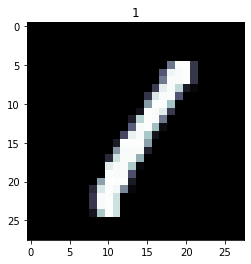

In [6]:
i = 3
plt.imshow(X[i,:].reshape((28,28)), cmap=plt.cm.bone)
print(y[i])
plt.title('{}'.format(y[i]))

In [7]:
np.unique(Y_train)  # show all unque number of y_train = have 0-9 

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [19]:
from teacherFunction import *

Yc_train = onehot(Y_train.reshape((-1,1)).astype(int))
print(Y_train[:5])
print(Yc_train[:5,:])

['6' '6' '3' '9' '0']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
Xn_train = X_train/255  # reformat colour value from 1-255 to be only 0-1 
print(np.min(Xn_train))
print(np.max(Xn_train))

0.0
1.0


Text(0.5, 1.0, 'y = 9')

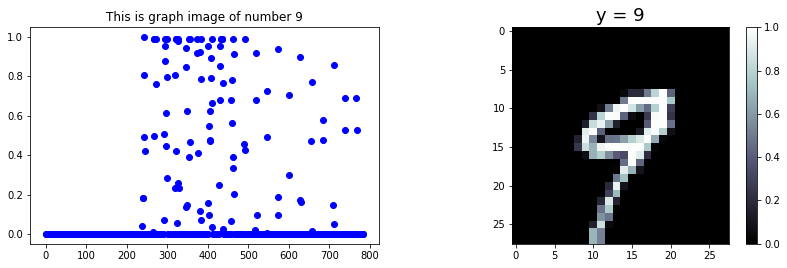

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=6, w_pad=4)  # 4 เหลี่ยม เริ่ม 0.1 0.1 กว้างจบ 2 สูงจบ 1

i = 5
plt.subplot(1,2,1)  # ตัวแยกกราฟ ซ้าย ขวา 1, 2, 1 คือตาราง 1*2 อยู่ 1
plt.plot(Xn_train[i,:], 'bo')  # x ตำแหน่งที่ i และค่าสีทั้งหมดของมัน
plt.title('This is graph image of number {}'.format(Y_train[i]))

plt.subplot(1,2,2)  # ตัวแยกกราฟ ซ้าย ขวา 1, 2, 1 คือตาราง 1*2 อยู่ 
s = plt.imshow(Xn_train[i,:].reshape((28,28)), cmap=plt.cm.bone)
plt.colorbar(s)
plt.title('y = {}'.format(Y_train[i]), fontsize=18)

Time spent: 35.13863253593445


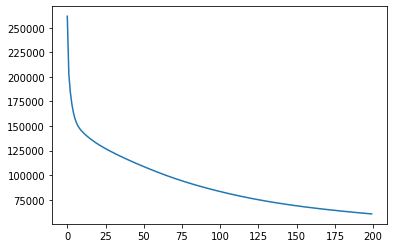

In [40]:
# Choose hyper-parameter, then initialize and train the network.
N, D = Xn_train.shape  # (60199, 784)
_, K = Yc_train.shape  # (60199, 10)
M = 8 # number of HUs hidden unit (hyper-parameter), 

# Biases and weights (parameters)
c = np.random.normal(0, 1, K).reshape((K,1))   # 10*1
v = np.random.normal(0, 1, K*M).reshape((K,M))  # 10*8
b = np.random.normal(0, 1, M).reshape((M,1))  # 8*1
w = np.random.normal(0, 1, M*D).reshape((M,D))  # 8*784

# print(c)
# print(v)
# print(b)
# print(w)


lr1 = 1/N
lr2 = 1/N



t1 = time.time()
cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, Xn_train, Yc_train, lr1, lr2, 200, softmax, cc_entropy)
t2 = time.time()

print('Time spent:', t2 - t1)

plt.plot(train_loss)



In [31]:
# lr1 = 1/N
# lr2 = 1/N

# t1 = time.time()
# cc, vv, bb, ww, train_loss2 = train_mlp2(c, v, b, w, Xn_train, Yc_train, lr1, lr2, 400, softmax, cc_entropy)
# t2 = time.time()

# print('Time spent:', t2 - t1)
# train_loss.extend(train_loss2)

# plt.plot(train_loss)
print(len(train_loss))
print(train_loss)


100
[251123.02659637784, 246949.28850818455, 243088.20857393157, 239503.4488599145, 236163.5685008217, 233041.43714618008, 230113.65772680574, 227360.03330067682, 224763.0933287873, 222307.68303186278, 219980.61303170962, 217770.36337695425, 215666.83494476334, 213661.14120995917, 211745.4339275988, 209912.75705801602, 208156.92409307926, 206472.41472625599, 204854.2875060223, 203298.10570997212, 201799.87417827293, 200355.98525934317, 198963.17235966076, 197618.4698654194, 196319.1784273117, 195062.83478058162, 193847.18541873115, 192670.16355755372, 191529.86892195925, 190424.54996576524, 189352.58819782213, 188312.48433936475, 187302.8460796395, 186322.3772314667, 185369.86811693743, 184444.18703707986, 183544.2726990054, 182669.1274905099, 181817.81150596385, 180989.43723906204, 180183.16486800363, 179398.19806725244, 178633.78028743417, 177889.19145136158, 177163.74501980675, 176456.78538558836, 175767.68555891863, 175095.84511084622, 174440.68834510207, 173801.66267176904, 173178

In [41]:
# Test network

Xn_test  = X_test/255

Yp = mlp2(cc, vv, bb, ww, Xn_test, softmax)
predicted_classes = np.argmax(Yp, axis=1)

test_acc = np.mean(predicted_classes == Y_test.astype(int))
print('Test accuracy', test_acc)

Test accuracy 0.6883991429445975


(10, 1)
(10, 8)
(8, 1)
(8, 784)


Text(0.5, 1.0, 'w')

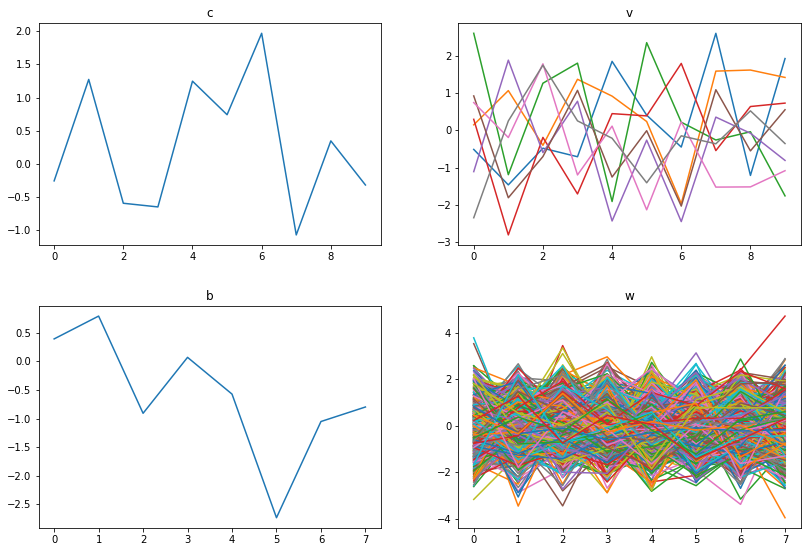

In [42]:
print(cc.shape)
print(vv.shape)
print(bb.shape)
print(ww.shape)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

plt.subplot(2,2,1)
plt.plot(cc)
plt.title('c')

plt.subplot(2,2,2)
plt.plot(vv)
plt.title('v')

plt.subplot(2,2,3)
plt.plot(bb)
plt.title('b')

plt.subplot(2,2,4)
plt.plot(ww)
plt.title('w')

In [43]:
net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}

np.save('trainedValue.npy', net)

In [44]:
# Test if it can be loaded ok

loaded_net = np.load('trainedValue.npy', allow_pickle=True)
print(type(loaded_net))

lnet = loaded_net.tolist()
print(type(lnet))

print(lnet['c'].shape)
print(lnet['v'].shape)
print(lnet['b'].shape)
print(lnet['w'].shape)


<class 'numpy.ndarray'>
<class 'dict'>
(10, 1)
(10, 8)
(8, 1)
(8, 784)


In [45]:
Yp = mlp2(lnet['c'], lnet['v'], lnet['b'], lnet['w'], Xn_test, softmax)
predicted_classes = np.argmax(Yp, axis=1)
test_acc = np.mean(predicted_classes == Y_test.astype(int))
print('Test accuracy', test_acc)


Test accuracy 0.6883991429445975


Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

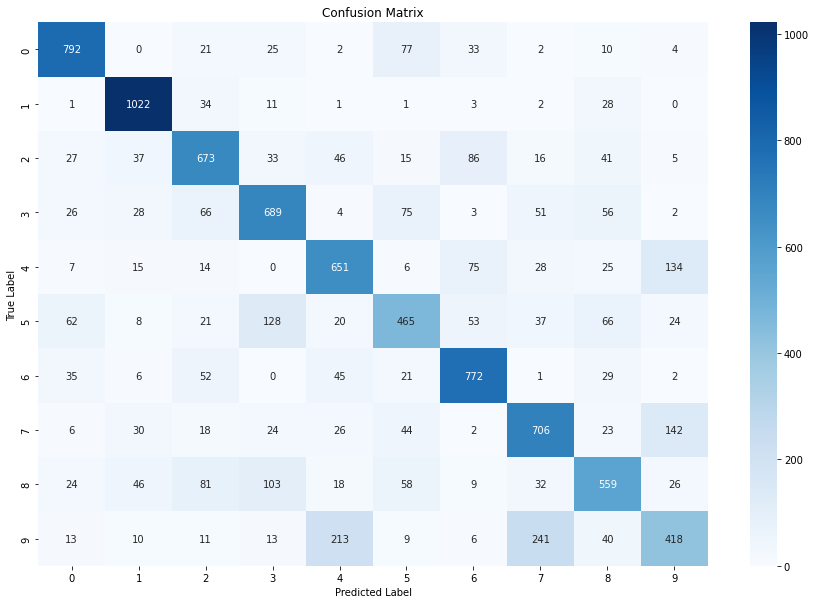

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Yp = mlp2(lnet['c'], lnet['v'], lnet['b'], lnet['w'], Xn_test, softmax)

y_predict = np.argmax(Yp, axis=1)
y_true = Y_test.astype(int)
confusion_matrix = confusion_matrix(y_true, y_predict)
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [ ]:
print(confusion_matrix)

In [ ]:
cmat = np.zeros((10, 10)) # Pred x G. Truth
cmat

Y_test_new = onehot(Y_test.reshape((-1,1)).astype(int))


for r in range(10):
    for c in range(10):
        ids = np.where(Y_test_new[0,:] == c)
        count = np.sum(Yc_train[ids] == r)
        cmat[r, c] = count
        print("%d & "%count, end='')
    print('\\\\')


In [ ]:
id9F = np.where((Y_test_new[0,:] == 3) * (Yc_train == 1))[0]
print(Y_test_new[0,:])

print(Y_test_new.shape)
print(Yc_train.shape)
# print(np.where((Y_test_new[0,:] == 1) * (Yc_train == 1))[0])
# print(id9F.shape)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout(rect=[0.1, 0.1, 12, 3], h_pad=2, w_pad=1)

for i, j in enumerate(id9F[:4]):
    print(i)
    print(j)

# for i, j in enumerate(id9F[:4]):
#     print(i)
#     print(j)
#     plt.subplot(1,4, 1 + i)
#     s = plt.imshow(X_train[j].reshape((28,28)), cmap=plt.cm.bone)
#     # plt.colorbar(s)
#     plt.title('y[%d] = %d; Predict %d'%(j, Y_test_new[:,j], Yc_train[j]), fontsize=52)
# plt.show()

In [ ]:
id4F = np.where( (Y_test_new[0,:] == 4) * (Yc_train == 9) )[0]

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout(rect=[0.1, 0.1, 12, 3], h_pad=2, w_pad=1)

for i, j in enumerate(id4F[:4]):
#     print(i)
    plt.subplot(1,4, 1 + i)
    s = plt.imshow(Xn_train[:,j].reshape((28,28)), cmap=plt.cm.bone)
# #     plt.colorbar(s)
    plt.title('y[%d] = %d; Predict %d'%(j, Y_test_new[:,j], Yc_train[j]), fontsize=52)
plt.show()   